In [1]:
# import necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

In [2]:
### Import Dataset

In [3]:
# Assign each link to a placeholder 
dataset_1 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainperf.csv'
dataset_2 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/traindemographics.csv'
dataset_3 = 'https://raw.githubusercontent.com/Oyeniran20/axia_cohort_8/refs/heads/main/trainprevloans.csv'

In [4]:
# Read the datasets into DataFrames
df1 = pd.read_csv(dataset_1)
df2 = pd.read_csv(dataset_2)
df3 = pd.read_csv(dataset_3)

### Data Cleaning and Exploratory Data Analysis 

In [5]:
# open df1
df1.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [6]:
df1.shape

(4368, 10)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


In [8]:
# Check for missing values in df1
df1.isna().sum().sort_values(ascending=False)

referredby       3781
customerid          0
systemloanid        0
loannumber          0
creationdate        0
approveddate        0
loanamount          0
totaldue            0
termdays            0
good_bad_flag       0
dtype: int64

In [9]:
# Check for duplicates in df1
df1.duplicated().sum()

np.int64(0)

In [10]:
# open df2 
df2.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [11]:
df2.shape

(4346, 9)

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


In [13]:
# Check for missing values in df2
df2.isna().sum().sort_values(ascending=False)

bank_branch_clients           4295
level_of_education_clients    3759
employment_status_clients      648
customerid                       0
birthdate                        0
latitude_gps                     0
longitude_gps                    0
bank_account_type                0
bank_name_clients                0
dtype: int64

In [14]:
# Check for duplicates in df2
df2.duplicated().sum()

np.int64(12)

In [15]:
# Drop duplicates and keep the last occurance
df2.drop_duplicates(keep="last", inplace = True)

In [16]:
# Check for duplicates in df2
df2.duplicated().sum()

np.int64(0)

In [17]:
# open df3 
df3.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [18]:
df3.shape

(18183, 12)

In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


In [20]:
# Check for missing values in df3
df3.isna().sum().sort_values(ascending=False)

referredby         17157
customerid             0
loannumber             0
systemloanid           0
approveddate           0
creationdate           0
totaldue               0
loanamount             0
termdays               0
closeddate             0
firstduedate           0
firstrepaiddate        0
dtype: int64

In [21]:
# Check for duplicates in df2
df2.duplicated().sum()

np.int64(0)

In [22]:
# join all using customerid 
df = df1.merge(df2, on="customerid", how="inner").merge(df3, on="customerid", how="inner")

In [23]:
df.head()

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,referredby_x,good_bad_flag,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,referredby_y,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,...,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,...,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,...,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,...,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,2017-06-25 15:24:06.000000,NaN,2017-07-03 00:00:00.000000,2017-06-25 15:13:56.000000
4,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,...,11,2017-06-28 10:58:34.000000,2017-06-28 09:58:25.000000,20000.0,24500.0,30,2017-07-25 08:14:36.000000,NaN,2017-07-31 00:00:00.000000,2017-07-25 08:04:27.000000


In [24]:
df.shape

(13673, 29)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13673 entries, 0 to 13672
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  13673 non-null  object 
 1   systemloanid_x              13673 non-null  int64  
 2   loannumber_x                13673 non-null  int64  
 3   approveddate_x              13673 non-null  object 
 4   creationdate_x              13673 non-null  object 
 5   loanamount_x                13673 non-null  float64
 6   totaldue_x                  13673 non-null  float64
 7   termdays_x                  13673 non-null  int64  
 8   referredby_x                800 non-null    object 
 9   good_bad_flag               13673 non-null  object 
 10  birthdate                   13673 non-null  object 
 11  bank_account_type           13673 non-null  object 
 12  longitude_gps               13673 non-null  float64
 13  latitude_gps                136

In [26]:
# Missing values 
df.isna().sum().sort_values(ascending=False)

bank_branch_clients           13569
referredby_y                  12873
referredby_x                  12873
level_of_education_clients    10209
employment_status_clients      1363
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
systemloanid_x                    0
loannumber_x                      0
approveddate_x                    0
customerid                        0
longitude_gps                     0
bank_account_type                 0
birthdate                         0
good_bad_flag                     0
latitude_gps                      0
systemloanid_y                    0
loannumber_y                      0
bank_name_clients                 0
approveddate_y                    0
creationdate_y                    0
totaldue_y                        0
loanamount_y                      0
termdays_y                        0
closeddate                        0
firstduedate                

In [27]:
# Percentage of the missing values
(df.isna().sum().sort_values(ascending=False)/len(df)) * 100 

bank_branch_clients           99.239377
referredby_y                  94.149053
referredby_x                  94.149053
level_of_education_clients    74.665399
employment_status_clients      9.968551
creationdate_x                 0.000000
loanamount_x                   0.000000
totaldue_x                     0.000000
termdays_x                     0.000000
systemloanid_x                 0.000000
loannumber_x                   0.000000
approveddate_x                 0.000000
customerid                     0.000000
longitude_gps                  0.000000
bank_account_type              0.000000
birthdate                      0.000000
good_bad_flag                  0.000000
latitude_gps                   0.000000
systemloanid_y                 0.000000
loannumber_y                   0.000000
bank_name_clients              0.000000
approveddate_y                 0.000000
creationdate_y                 0.000000
totaldue_y                     0.000000
loanamount_y                   0.000000


In [28]:
# duplicate
df.duplicated().sum()

np.int64(0)

In [29]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
systemloanid_x,13673.0,3.019801e+08,13442.183267,3.019585e+08,3.019678e+08,3.019788e+08,3.019929e+08,3.020040e+08
loannumber_x,13673.0,8.404154e+00,4.319122,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01,2.700000e+01
loanamount_x,13673.0,2.568895e+04,12623.903472,1.000000e+04,1.000000e+04,3.000000e+04,4.000000e+04,6.000000e+04
totaldue_x,13673.0,2.981097e+04,13769.244851,1.000000e+04,1.300000e+04,3.300000e+04,4.400000e+04,6.810000e+04
termdays_x,13673.0,3.321985e+01,14.433599,1.500000e+01,3.000000e+01,3.000000e+01,3.000000e+01,9.000000e+01
longitude_gps,13673.0,4.478997e+00,8.645320,-1.182470e+02,3.354724e+00,3.573519e+00,6.355602e+00,1.512093e+02
latitude_gps,13673.0,7.290004e+00,3.437288,-3.386882e+01,6.471885e+00,6.617599e+00,7.421333e+00,7.122807e+01
systemloanid_y,13673.0,3.018393e+08,93057.933941,3.016001e+08,3.017766e+08,3.018543e+08,3.019192e+08,3.020003e+08
loannumber_y,13673.0,4.202296e+00,3.270281,1.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00,2.600000e+01
loanamount_y,13673.0,1.657010e+04,9377.817726,3.000000e+03,1.000000e+04,1.000000e+04,2.000000e+04,6.000000e+04


df has; 
- Missing values
- change datatype

In [30]:
# drop columns with missing values above 70
df.drop(columns=['bank_branch_clients','referredby_y','referredby_x'], inplace=True)

In [31]:
# Missing values 
df.isna().sum().sort_values(ascending=False)

level_of_education_clients    10209
employment_status_clients      1363
loannumber_x                      0
approveddate_x                    0
creationdate_x                    0
loanamount_x                      0
totaldue_x                        0
termdays_x                        0
customerid                        0
systemloanid_x                    0
birthdate                         0
good_bad_flag                     0
bank_account_type                 0
longitude_gps                     0
bank_name_clients                 0
latitude_gps                      0
systemloanid_y                    0
loannumber_y                      0
approveddate_y                    0
creationdate_y                    0
loanamount_y                      0
totaldue_y                        0
termdays_y                        0
closeddate                        0
firstduedate                      0
firstrepaiddate                   0
dtype: int64

In [32]:
# Get the mode value of columns with missing values
mode_values = df["level_of_education_clients"].mode()[0]
mode_value = df["employment_status_clients"].mode()[0]

In [33]:
# Fill column missing values with mode values
df["level_of_education_clients"].fillna(mode_values, inplace=True)
df["employment_status_clients"].fillna(mode_value, inplace=True)

In [34]:
# Missing values 
df.isna().sum().sort_values(ascending=False)

customerid                    0
systemloanid_x                0
loannumber_x                  0
approveddate_x                0
creationdate_x                0
loanamount_x                  0
totaldue_x                    0
termdays_x                    0
good_bad_flag                 0
birthdate                     0
bank_account_type             0
longitude_gps                 0
latitude_gps                  0
bank_name_clients             0
employment_status_clients     0
level_of_education_clients    0
systemloanid_y                0
loannumber_y                  0
approveddate_y                0
creationdate_y                0
loanamount_y                  0
totaldue_y                    0
termdays_y                    0
closeddate                    0
firstduedate                  0
firstrepaiddate               0
dtype: int64

In [35]:
datetime_cols = ['approveddate_x', 'creationdate_x', 'approveddate_y', 'creationdate_y',
                 'closeddate','firstduedate','firstrepaiddate', 'birthdate']

In [36]:
# Convert datetime_cols to datetime
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13673 entries, 0 to 13672
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  13673 non-null  object        
 1   systemloanid_x              13673 non-null  int64         
 2   loannumber_x                13673 non-null  int64         
 3   approveddate_x              13673 non-null  datetime64[ns]
 4   creationdate_x              13673 non-null  datetime64[ns]
 5   loanamount_x                13673 non-null  float64       
 6   totaldue_x                  13673 non-null  float64       
 7   termdays_x                  13673 non-null  int64         
 8   good_bad_flag               13673 non-null  object        
 9   birthdate                   13673 non-null  datetime64[ns]
 10  bank_account_type           13673 non-null  object        
 11  longitude_gps               13673 non-null  float64   

In [38]:
# Assess the class imbalance in 'loan_default'
df['good_bad_flag'].value_counts()

good_bad_flag
Good    11146
Bad      2527
Name: count, dtype: int64

In [39]:
# Compare default rates across education
education_defaults = df.groupby('level_of_education_clients')['good_bad_flag'].value_counts()
eds = pd.DataFrame(education_defaults)
eds

count
level_of_education_clients good_bad_flag       
Graduate                   Good           10400
                           Bad             2317
Post-Graduate              Good             346
                           Bad               89
Primary                    Good              35
                           Bad                1
Secondary                  Good             365
                           Bad              120

In [40]:
# Compare default rates across employment
employment_defaults = df.groupby('employment_status_clients')['good_bad_flag'].value_counts()
ems = pd.DataFrame(employment_defaults)
ems

count
employment_status_clients good_bad_flag       
Contract                  Good              10
Permanent                 Good            8481
                          Bad             2000
Retired                   Good              29
Self-Employed             Good            1972
                          Bad              347
Student                   Good             475
                          Bad              140
Unemployed                Good             179
                          Bad               40

In [41]:
# create the loan_default 
df['loan_default'] = df['good_bad_flag'].map({'Bad': 0, 'Good': 1})

In [42]:
df.head()

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,birthdate,...,loannumber_y,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate,loan_default
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43,1
1,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00,1
2,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47,1
3,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,10,2017-06-01 13:34:30,2017-06-01 12:34:21,20000.0,24500.0,30,2017-06-25 15:24:06,2017-07-03,2017-06-25 15:13:56,1
4,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,11,2017-06-28 10:58:34,2017-06-28 09:58:25,20000.0,24500.0,30,2017-07-25 08:14:36,2017-07-31,2017-07-25 08:04:27,1


In [43]:
# numerical columns 
num_cols = ['loannumber_x','loanamount_x','totaldue_x','termdays_x','loannumber_y','loanamount_y','termdays_y','totaldue_y',
            'loan_default']

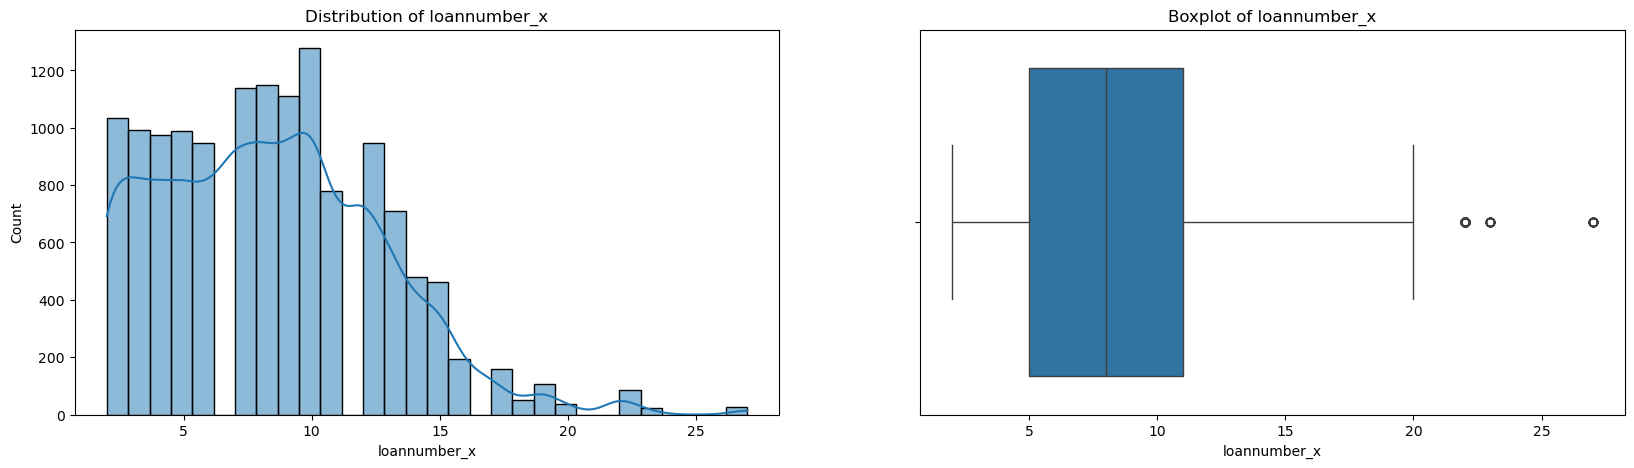

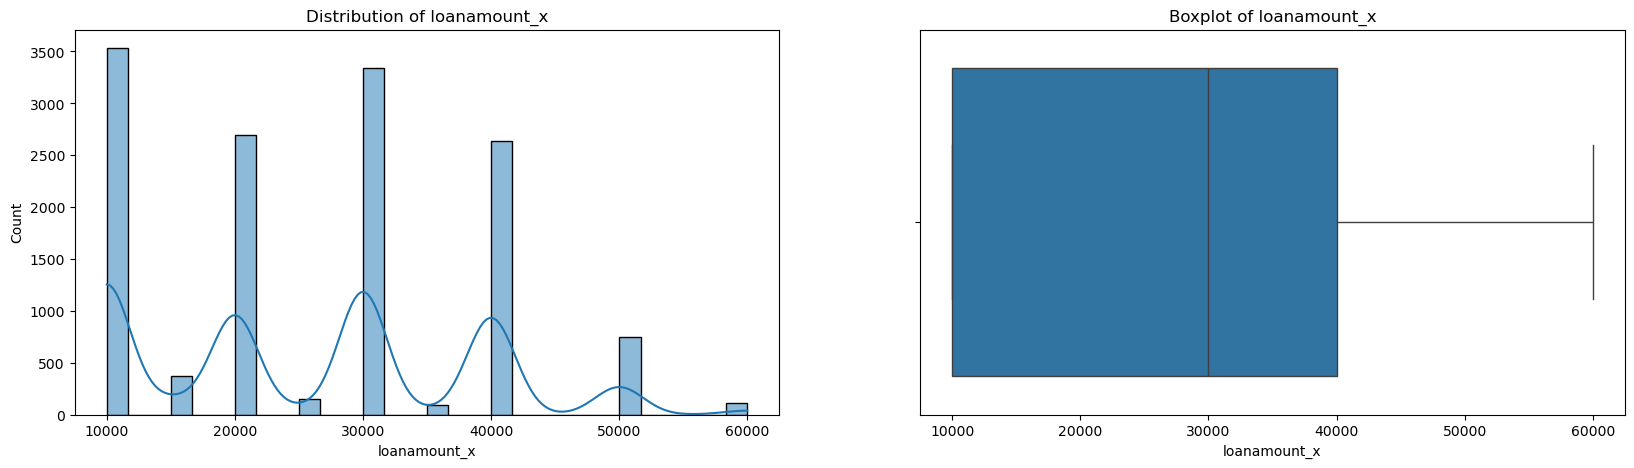

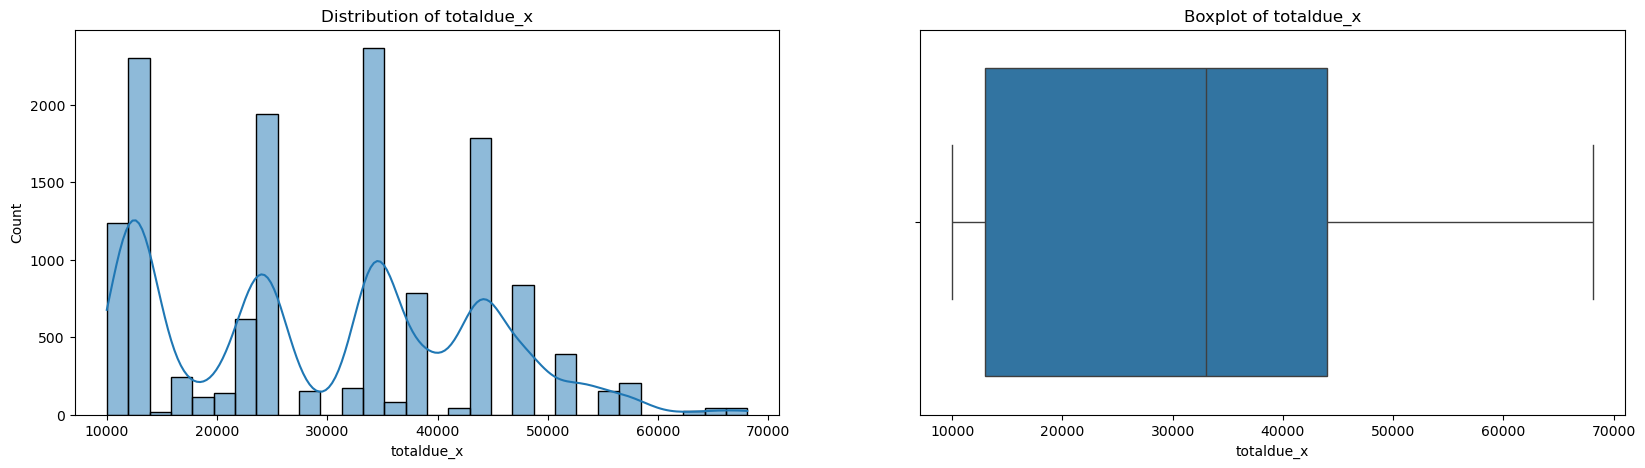

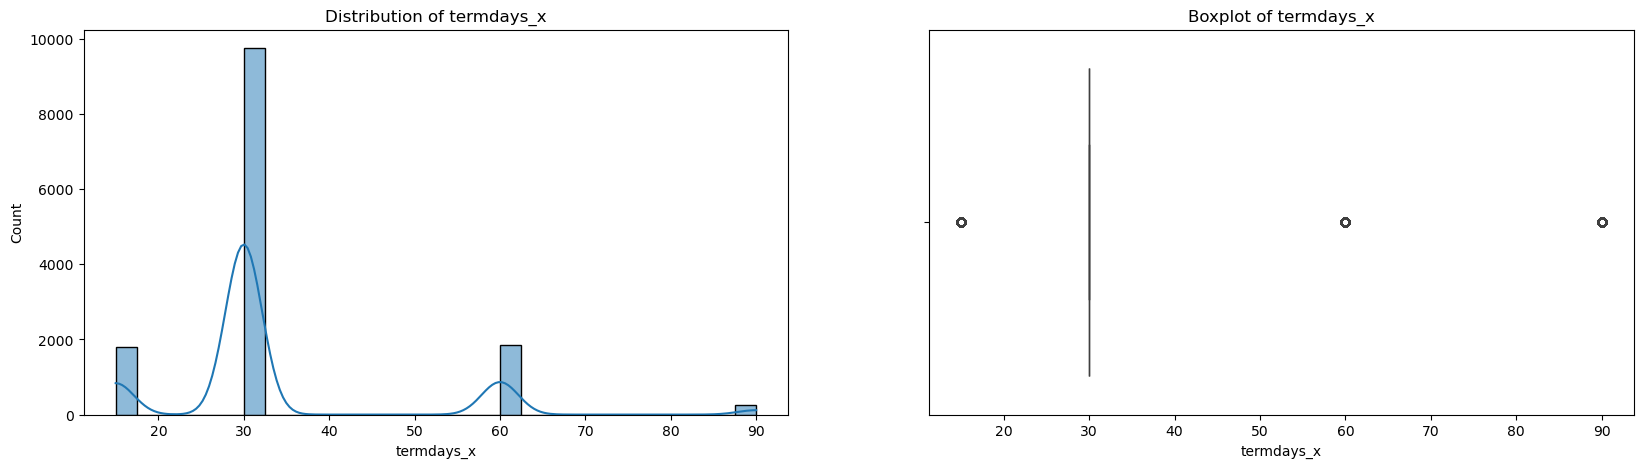

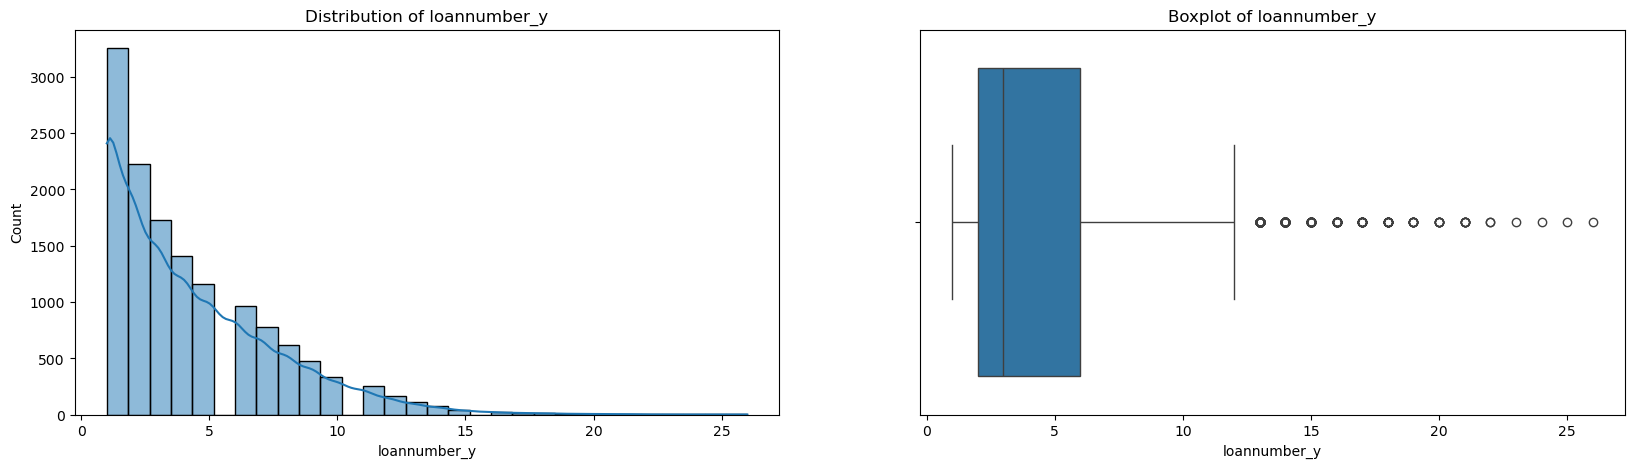

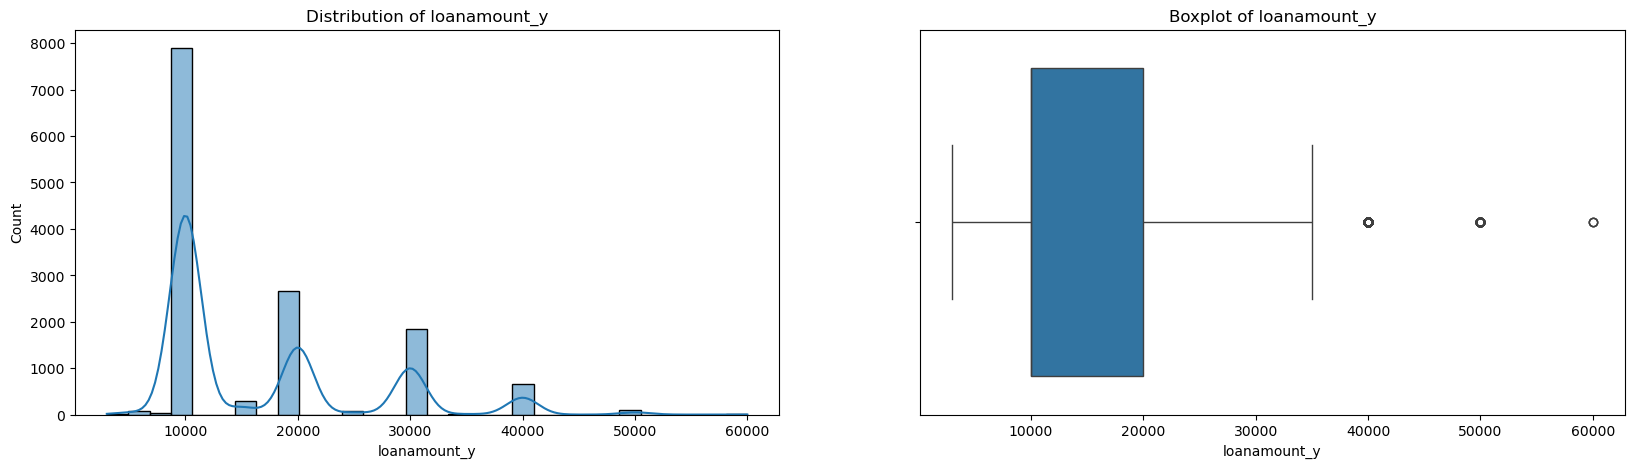

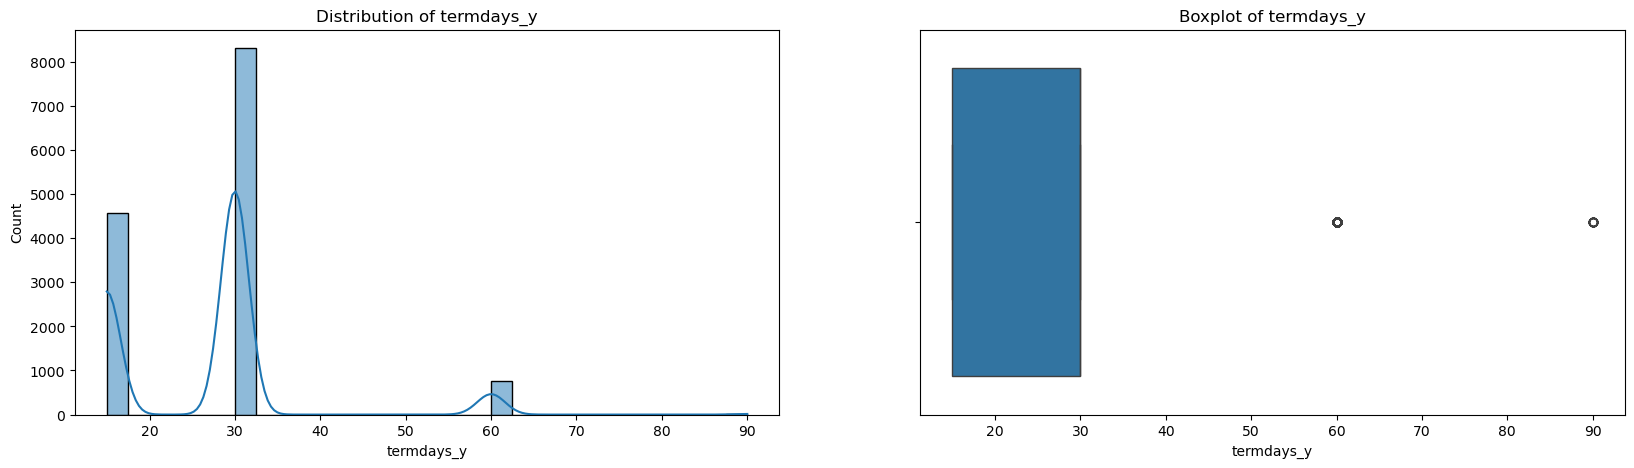

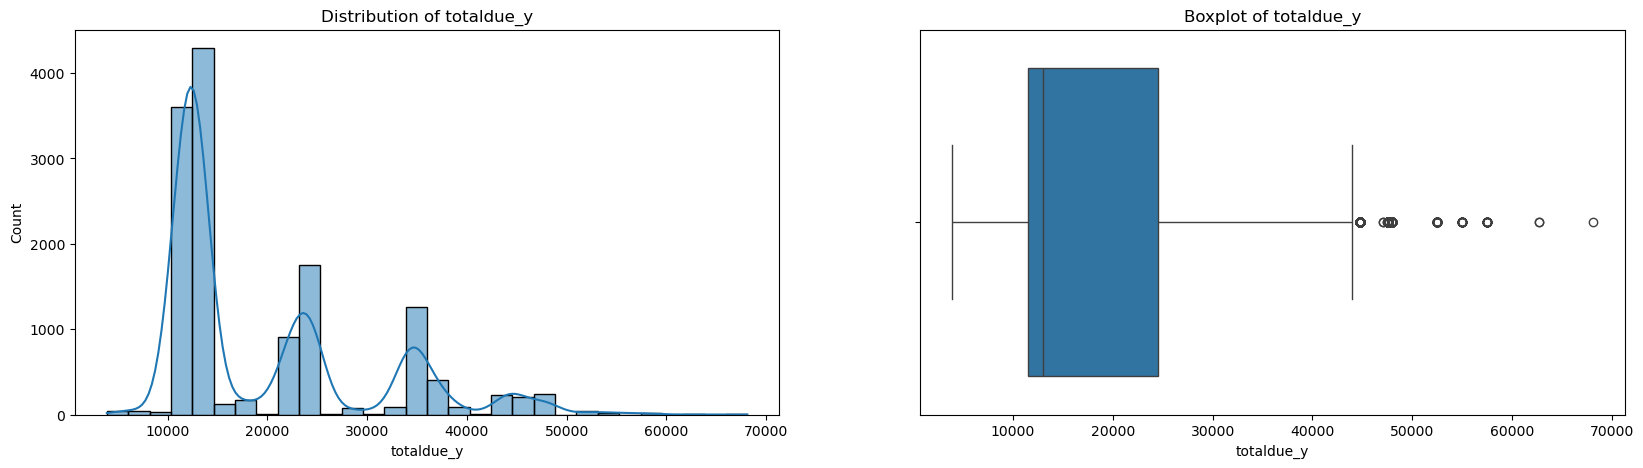

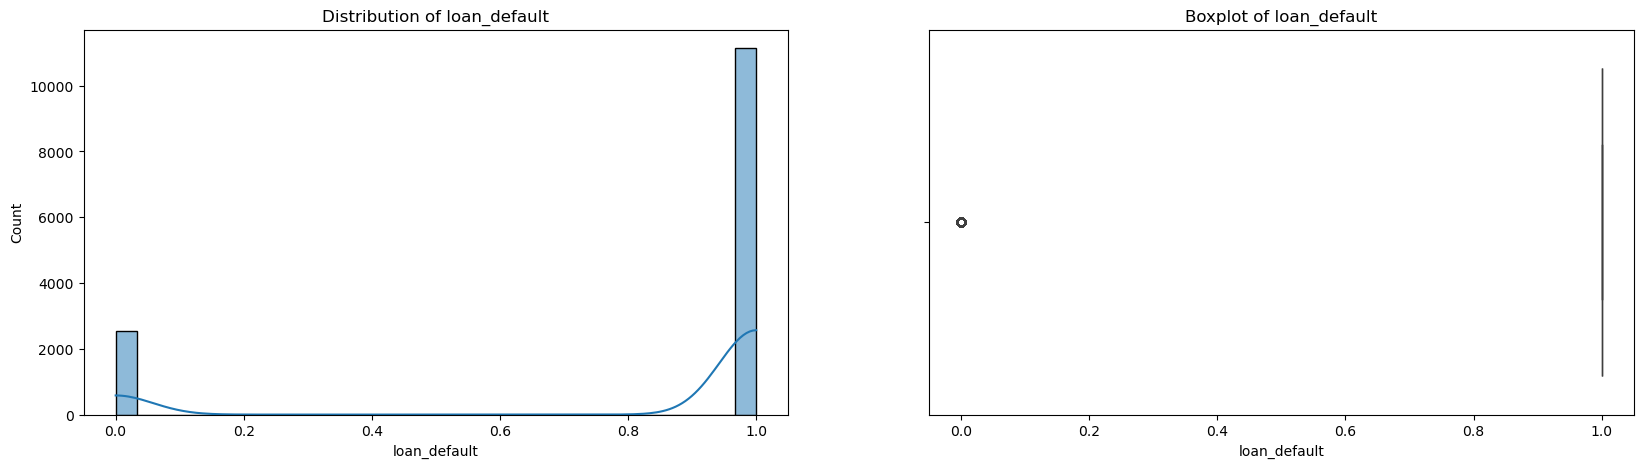

In [44]:
# distribution of our numeric columns

for col in num_cols:
    plt.figure(figsize=(20,5))
   # Histogram
    plt.subplot(1,2,1)
    sns.histplot(data=df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
   
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

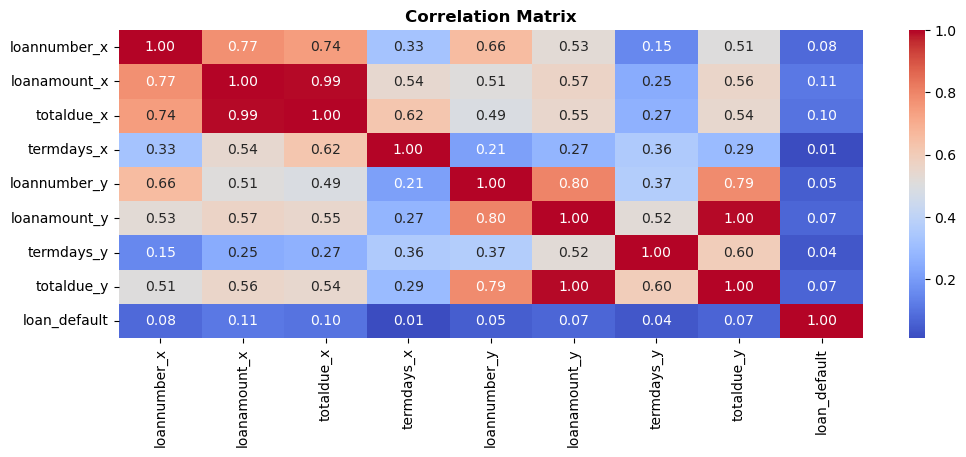

In [45]:
# Correlation matrix
plt.figure(figsize=(12,4))
heatmap= df[num_cols].corr()
sns.heatmap(data=heatmap, fmt= '.2f', annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontweight='bold')
plt.show()

### Feature Engineering

In [46]:
# Determine how long it took them to pay off the last loan 
df['loan_paid_days_y'] = (df['closeddate'] - df['approveddate_y']).dt.days

In [47]:
df.head()

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,birthdate,...,approveddate_y,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate,loan_default,loan_paid_days_y
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43,1,16
1,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00,1,29
2,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47,1,52
3,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2017-06-01 13:34:30,2017-06-01 12:34:21,20000.0,24500.0,30,2017-06-25 15:24:06,2017-07-03,2017-06-25 15:13:56,1,24
4,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2017-06-28 10:58:34,2017-06-28 09:58:25,20000.0,24500.0,30,2017-07-25 08:14:36,2017-07-31,2017-07-25 08:04:27,1,26


In [48]:
# for risk band
df['difference_days'] = (df['termdays_y'] - df['loan_paid_days_y'])

In [49]:
df.head()

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,birthdate,...,creationdate_y,loanamount_y,totaldue_y,termdays_y,closeddate,firstduedate,firstrepaiddate,loan_default,loan_paid_days_y,difference_days
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43,1,16,14
1,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00,1,29,1
2,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47,1,52,-22
3,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2017-06-01 12:34:21,20000.0,24500.0,30,2017-06-25 15:24:06,2017-07-03,2017-06-25 15:13:56,1,24,6
4,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,2017-06-28 09:58:25,20000.0,24500.0,30,2017-07-25 08:14:36,2017-07-31,2017-07-25 08:04:27,1,26,4


In [50]:
# Determine the age 
df['age'] = (pd.Timestamp.now() - df['birthdate']).dt.days // 365

In [51]:
df.age.unique()

array([53, 40, 47, 39, 36, 37, 38, 42, 60, 48, 46, 43, 49, 31, 33, 41, 34,
       44, 50, 63, 55, 45, 29, 51, 54, 30, 35, 58, 32, 59, 52, 57, 56, 62,
       61])

In [52]:
df.age.min()

29

In [53]:
df.age.max()

63

In [54]:
# create a payment_behavior_score
def payment_score(difference_days):
    if difference_days >= 1:
        return 'Low'
    elif difference_days == 0:
        return 'Medium'
    elif difference_days <= -1:
        return 'High'
    else:
        return 'Error'

In [55]:
# Apply payment_behavior_score
df['payment_score'] = df['difference_days'].apply(payment_score)

In [56]:
def assign_risk_band(loanamount_y):
    if loanamount_y <= 10000:
        return 'Low'
    elif loanamount_y <= 30000:
        return 'Medium'
    elif loanamount_y > 30000:
        return 'High'
    else:
        return 'Error'

In [57]:
# Apply risk band 
df['risk_band'] = df['loanamount_y'].apply(assign_risk_band)

In [58]:
df.head()

,customerid,systemloanid_x,loannumber_x,approveddate_x,creationdate_x,loanamount_x,totaldue_x,termdays_x,good_bad_flag,birthdate,...,termdays_y,closeddate,firstduedate,firstrepaiddate,loan_default,loan_paid_days_y,difference_days,age,payment_score,risk_band
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,30,2016-09-01 16:06:48,2016-09-14,2016-09-01 15:51:43,1,16,14,53,Low,Low
1,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,30,2017-05-28 14:44:49,2017-05-30,2017-05-26 00:00:00,1,29,1,53,Low,Low
2,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,30,2017-04-26 22:18:56,2017-04-04,2017-04-26 22:03:47,1,52,-22,53,High,Medium
3,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,30,2017-06-25 15:24:06,2017-07-03,2017-06-25 15:13:56,1,24,6,53,Low,Medium
4,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,1972-01-15,...,30,2017-07-25 08:14:36,2017-07-31,2017-07-25 08:04:27,1,26,4,53,Low,Medium


<Axes: xlabel='good_bad_flag'>

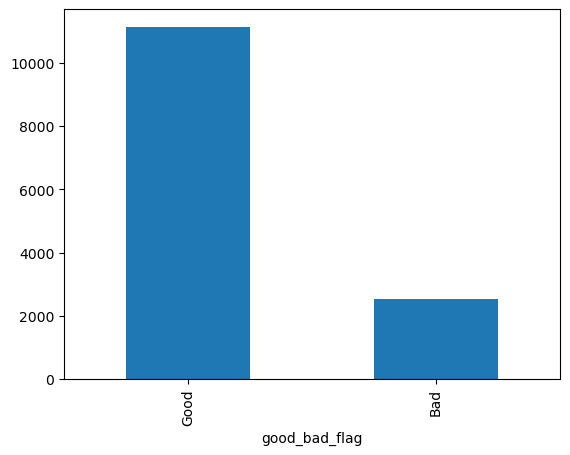

In [59]:
# Visualize the target Column
df.good_bad_flag.value_counts().plot(kind='bar')

In [60]:
# convert text to number 
df.good_bad_flag = (df.good_bad_flag == 'Good').astype(int)

In [61]:
df.good_bad_flag.unique()

array([1, 0])

In [62]:
# Import other necessary Libraries 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [63]:
pip show shap scikit-learn

Name: shap
Version: 0.48.0
Summary: A unified approach to explain the output of any machine learning model.
Home-page: 
Author: 
Author-email: Scott Lundberg <slund1@cs.washington.edu>
License: MIT License
Location: C:\Users\Wisdom Ogbeche\anaconda3\Lib\site-packages
Requires: cloudpickle, numba, numpy, packaging, pandas, scikit-learn, scipy, slicer, tqdm, typing-extensions
Required-by: 
---
Name: scikit-learn
Version: 1.6.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the ab

In [64]:
!pip install shap

In [65]:
# preprocessing 
x = df.drop(['good_bad_flag', 'customerid', 'systemloanid_x', 'systemloanid_y'], axis=1)
Y = df['good_bad_flag']

In [66]:
# Split Data
x_train, x_test, Y_train, Y_test = train_test_split(x, Y,random_state=42)

In [67]:
# separate into cat and num cols
num_cols = x.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = x.select_dtypes(include='object').columns.tolist()

In [68]:
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ])

In [69]:
# Apply preprocessor
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

In [70]:
# Variance Threshold
selector = VarianceThreshold(threshold=0.2)
x_train_var = selector.fit_transform(x_train_transformed)
var_features = preprocessor.get_feature_names_out()[selector.get_support()]

In [71]:
# print Variance Threshold
print("Variance Threshold Features:", var_features)

Variance Threshold Features: ['num__loannumber_x' 'num__loanamount_x' 'num__totaldue_x'
 'num__termdays_x' 'num__longitude_gps' 'num__latitude_gps'
 'num__loannumber_y' 'num__loanamount_y' 'num__totaldue_y'
 'num__termdays_y' 'num__loan_default' 'num__loan_paid_days_y'
 'num__difference_days' 'num__age' 'cat__bank_account_type_Other'
 'cat__bank_account_type_Savings' 'cat__bank_name_clients_GT Bank'
 'cat__payment_score_Low' 'cat__risk_band_Low' 'cat__risk_band_Medium']


In [72]:
# RFE with Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(x_train_var, Y_train)
rfe_features = var_features[rfe.support_]

In [73]:
# print RFE
print("RFE Features:", rfe_features)

RFE Features: ['num__loanamount_y' 'num__loan_default' 'cat__bank_account_type_Other'
 'cat__bank_account_type_Savings' 'cat__bank_name_clients_GT Bank'
 'cat__payment_score_Low' 'cat__risk_band_Low' 'cat__risk_band_Medium']


In [74]:
# SHAP
model.fit(x_train_transformed, Y_train)
explainer = shap.LinearExplainer(model, x_train_transformed)
shap_values = explainer.shap_values(x_train_transformed)
shap_summary = np.abs(shap_values).mean(axis=0)  # Mean absolute SHAP values
top_features_idx = np.argsort(shap_summary)[-8:]
shap_features = preprocessor.get_feature_names_out()[top_features_idx]

In [75]:
# print SHAP
print("SHAP Features:", shap_features)

SHAP Features: ['cat__level_of_education_clients_Graduate' 'cat__risk_band_Medium'
 'cat__employment_status_clients_Permanent'
 'cat__bank_account_type_Savings' 'cat__payment_score_Low'
 'cat__risk_band_Low' 'cat__bank_account_type_Other' 'num__loan_default']


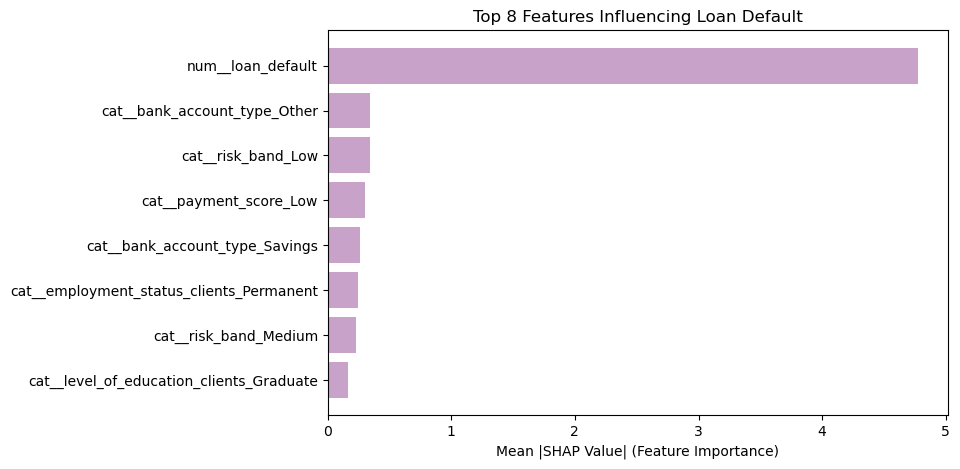

In [77]:
# Bar chart of top features
plt.figure(figsize=(8, 5))
plt.barh(shap_features, shap_summary[top_features_idx], color="#C8A2C8")
plt.xlabel("Mean |SHAP Value| (Feature Importance)")
plt.title("Top 8 Features Influencing Loan Default")
plt.show()

In [78]:
# Combine features
selected_features = list(set(var_features) | set(rfe_features) | set(shap_features))

FT = pd.DataFrame(selected_features)
FT

,0
0,num__totaldue_x
1,num__termdays_y
2,cat__risk_band_Low
3,num__loanamount_x
4,num__age
5,num__loannumber_y
6,num__loan_default
7,num__loannumber_x
8,num__longitude_gps
9,num__loanamount_y


In [79]:
### Data preparation

In [80]:
# other necessary Libraries 
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [81]:
df.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'good_bad_flag', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'closeddate', 'firstduedate', 'firstrepaiddate',
       'loan_default', 'loan_paid_days_y', 'difference_days', 'age',
       'payment_score', 'risk_band'],
      dtype='object')

In [96]:
# selecting features 
selected_features = ['good_bad_flag', 'risk_band', 'loannumber_x', 'loanamount_x', 'totaldue_x', 'termdays_x', 'loannumber_y', 'loanamount_y', 'totaldue_y', 'termdays_y', 'loan_paid_days_y', 'payment_score', 'difference_days', 'age', 'level_of_education_clients', 'employment_status_clients', 'bank_name_clients', 'bank_account_type']

In [97]:
# Create new DataFrame with theselected features 
new_df = df[selected_features]

In [98]:
new_df.head()

,good_bad_flag,risk_band,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y,loan_paid_days_y,payment_score,difference_days,age,level_of_education_clients,employment_status_clients,bank_name_clients,bank_account_type
0,1,Low,12,30000.0,34500.0,30,2,10000.0,13000.0,30,16,Low,14,53,Post-Graduate,Permanent,Diamond Bank,Other
1,1,Low,12,30000.0,34500.0,30,9,10000.0,13000.0,30,29,Low,1,53,Post-Graduate,Permanent,Diamond Bank,Other
2,1,Medium,12,30000.0,34500.0,30,8,20000.0,23800.0,30,52,High,-22,53,Post-Graduate,Permanent,Diamond Bank,Other
3,1,Medium,12,30000.0,34500.0,30,10,20000.0,24500.0,30,24,Low,6,53,Post-Graduate,Permanent,Diamond Bank,Other
4,1,Medium,12,30000.0,34500.0,30,11,20000.0,24500.0,30,26,Low,4,53,Post-Graduate,Permanent,Diamond Bank,Other


In [99]:
new_df['level_of_education_clients'].unique()

array(['Post-Graduate', 'Graduate', 'Primary', 'Secondary'], dtype=object)

In [100]:
# preprocessing 
X = new_df.drop(['good_bad_flag'], axis=1)
y = new_df['good_bad_flag']

In [101]:
# split the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=42)

In [102]:
# separate into cat and num cols
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [103]:
# column transformer
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'))
])

In [104]:
# combine column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,numerical_cols),
    ('cat',cat_transformer,categorical_cols)
])

In [105]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['loannumber_x', 'loanamount_x', 'totaldue_x',
                                  'termdays_x', 'loannumber_y', 'loanamount_y',
                                  'totaldue_y', 'termdays_y',
                                  'loan_paid_days_y', 'difference_days',
                                  'age']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['risk_band', 'payment_score',
                                  'level_of_education_clients',
                                  'employment_status_clients',
                                  'bank_name_clients', 'bank_account_type'])])

In [106]:
# define the models
models = {
    ' Logistic Regression': LogisticRegression(),
    'Light': lgb.LGBMClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Boost': GradientBoostingClassifier(random_state=42),
    'Extreme': xgb.XGBClassifier(random_state=42)
}

[LightGBM] [Info] Number of positive: 10031, number of negative: 2274
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 496
[LightGBM] [Info] Number of data points in the train set: 12305, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.815197 -> initscore=1.484140
[LightGBM] [Info] Start training from score 1.484140


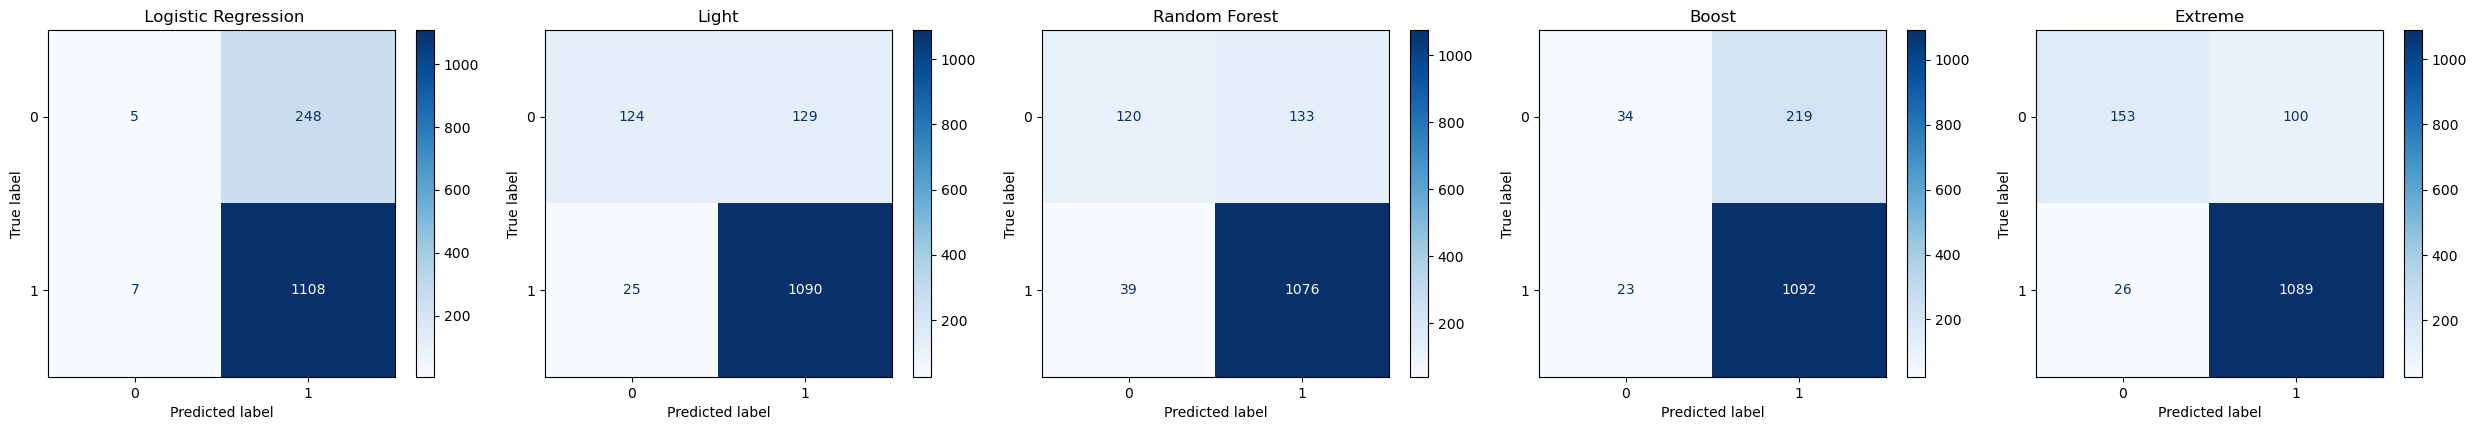


Classification Metrics


,Accuracy,Precision,F1-Score,ROC AUC,Recall
Logistic Regression,0.814,0.817,0.897,0.677,0.994
Light,0.887,0.894,0.934,0.932,0.978
Random Forest,0.874,0.890,0.926,0.902,0.965
Boost,0.823,0.833,0.900,0.792,0.979
Extreme,0.908,0.916,0.945,0.942,0.977


In [107]:
# using a for loop to evaluate our model
results = {}
fig, axes = plt.subplots(1, len(models), figsize=(len(models) * 5, 4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict the training and test scores
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    #Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    recall = recall_score(y_test, y_pred)
    

    # store the result
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Recall': recall,
       
    }

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results).T
metrics_df.round(3)

**Blancing the Traget Column**

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
y_train.value_counts()

good_bad_flag
1    10031
0     2274
Name: count, dtype: int64

In [110]:
# Apply preorocessor and Smote 
smote = SMOTE(random_state=42)
x_train_processed = preprocessor.fit_transform(X_train) 
x_train_resample, y_train_resample = smote.fit_resample(x_train_processed, y_train)

In [111]:
y_train_resample.value_counts()

good_bad_flag
1    10031
0    10031
Name: count, dtype: int64

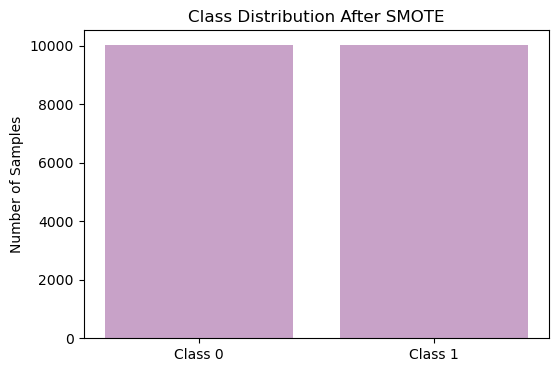

In [147]:
resampled_counts = np.bincount(y_train_resample)
labels = ['Class 0', 'Class 1']

plt.figure(figsize=(6,4))
plt.bar(labels, resampled_counts, color='#C8A2C8')
plt.ylabel("Number of Samples")
plt.title("Class Distribution After SMOTE")
plt.show()

[LightGBM] [Info] Number of positive: 10031, number of negative: 10031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.184745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5985
[LightGBM] [Info] Number of data points in the train set: 20062, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


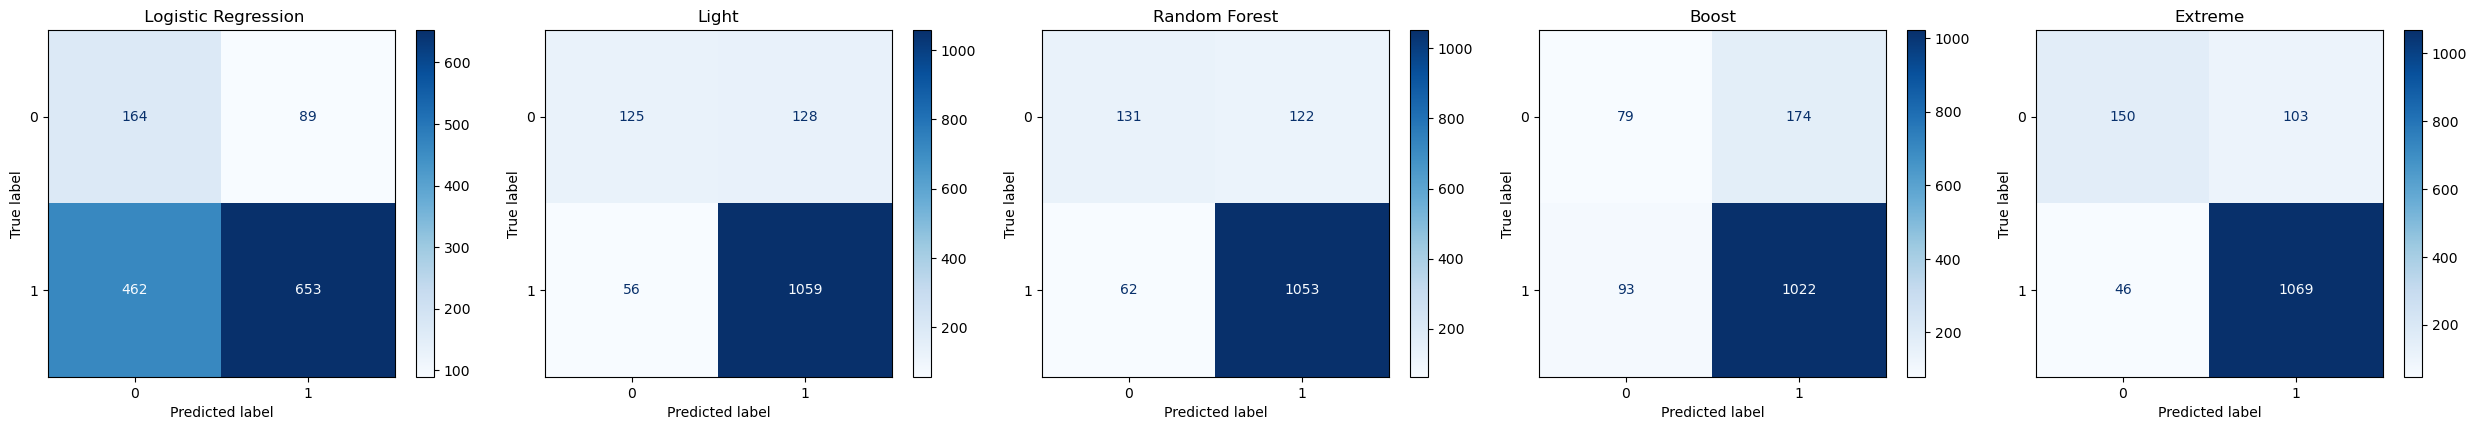


Classification Metrics


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.597,0.880,0.586,0.703,0.675
Light,0.865,0.892,0.950,0.920,0.895
Random Forest,0.865,0.896,0.944,0.920,0.873
Boost,0.805,0.855,0.917,0.884,0.743
Extreme,0.891,0.912,0.959,0.935,0.927


In [112]:
# Fit and transform data outside the loop
x_train_processed = preprocessor.fit_transform(X_train)
x_test_processed = preprocessor.transform(X_test)

# Apply SMOTE outside the loop
x_train_resample, y_train_resample = smote.fit_resample(x_train_processed, y_train)

# using a for loop to evaluate our model
results = {}
fig, axes = plt.subplots(1, len(models), figsize=(len(models) * 5, 4))

for (name, model), ax in zip(models.items(), axes.flatten()):
    # Define the pipeline with only the model
    pipeline = Pipeline(steps=[
        ('model', model)
    ])

    # Train the model using resampled data
    pipeline.fit(x_train_resample, y_train_resample)

    # Predict on the processed test data
    y_pred = pipeline.predict(x_test_processed)
    y_proba = pipeline.predict_proba(x_test_processed)[:, 1]

    #Evaluate the predictions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    # store the result
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
    }

    # plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(name)

plt.tight_layout()
plt.show()

# print metrics
print('\nClassification Metrics')
metrics_df = pd.DataFrame(results).T
metrics_df.round(3)

**Stratified K-Fold Cross Validation**

In [113]:
# Define the model(using random forest cause its the most accurate)
rf_model = RandomForestClassifier(random_state=42)

In [114]:
# Define Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [115]:
# Create a pipeline with a preprocessor and a RandomForestClassifier
pipeline_rf_skf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [116]:
# Perform cross-validation on the resampled data
cv_scores_rf_skf = cross_val_score(pipeline_rf_skf, X_train, y_train, cv=skf, scoring='accuracy')
print("Cross-validation accuracy scores (Random Forest with Stratified K-Fold):", cv_scores_rf_skf)
print("Mean cross-validation accuracy (Random Forest with Stratified K-Fold):", cv_scores_rf_skf.mean())

Cross-validation accuracy scores (Random Forest with Stratified K-Fold): [0.86509549 0.85534336 0.85696871 0.87159691 0.86712718]
Mean cross-validation accuracy (Random Forest with Stratified K-Fold): 0.8632263307598537


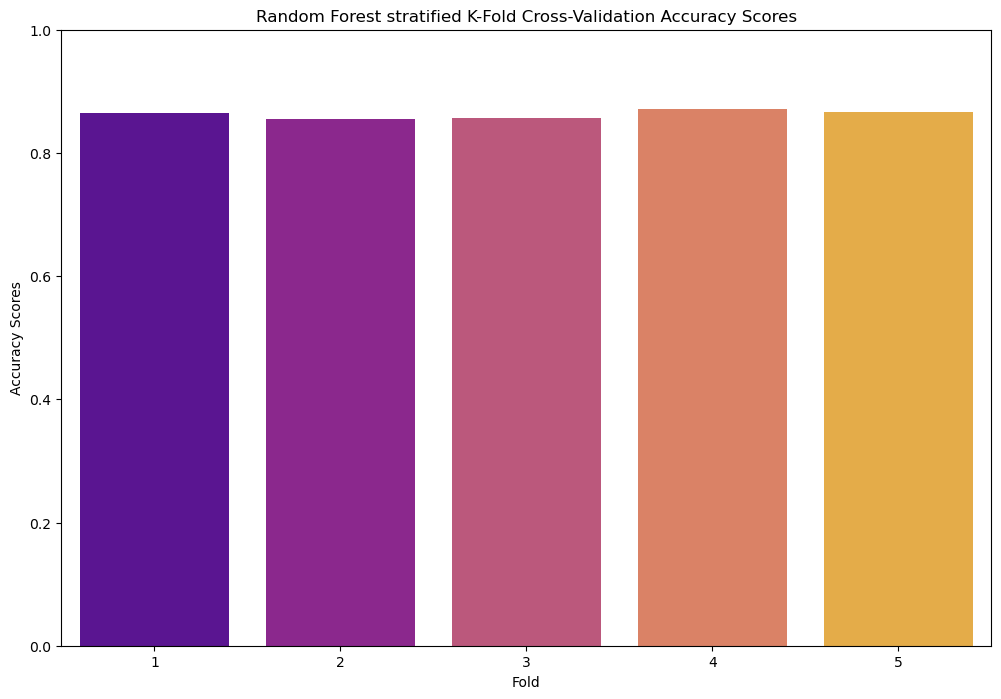

In [117]:
plt.figure(figsize=(12, 8))
sns.barplot(x=list(range(1, len(cv_scores_rf_skf) + 1)), y=cv_scores_rf_skf, palette='plasma')
plt.title('Random Forest stratified K-Fold Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy Scores')
plt.ylim(0, 1)
plt.show()

**Hyperparameter Turning**

In [118]:
# Fit the RandomForestClassifier model to the training data
model = RandomForestClassifier(random_state=42)
model.fit(x_train_resample, y_train_resample) 

RandomForestClassifier(random_state=42)

In [119]:
# Evaluate the model on the processed training data
train_pred = model.predict(x_train_processed)
train_score = accuracy_score( y_train,train_pred)

In [120]:
# Evaluate the model on the processed test data
test_pred = model.predict(x_test_processed)
test_score = accuracy_score(y_test,test_pred)

In [121]:
print(f"Training Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

Training Accuracy: 0.9968
Test Accuracy: 0.8655


In [122]:
model = RandomForestClassifier(random_state=42)

# define our hyperparameter
parameters = {
    'n_estimators': range(5,50,5),
    'max_depth': range(2,11,2),
    'min_samples_leaf': [2,5,40]
}

# Perform GridSearchCV for hyperparameter tuning
search = GridSearchCV(estimator=model, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
search.fit(x_train_resample, y_train_resample) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(2, 11, 2),
                         'min_samples_leaf': [2, 5, 40],
                         'n_estimators': range(5, 50, 5)},
             scoring='accuracy')

In [123]:
# Get the best model from GridSearchCV
best_model = search.best_estimator_
best_model

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=40,
                       random_state=42)

In [124]:
# Evaluate the best model on the processed training data
train_pred = best_model.predict(x_train_processed)
train_score = accuracy_score( y_train,train_pred)

# Evaluate the best model on the processed test data
test_pred = best_model.predict(x_test_processed)
test_score = accuracy_score(y_test,test_pred)

In [125]:
train_score, test_score

(0.8467289719626169, 0.8004385964912281)

### Feature importance

In [126]:
# Use the best model from GridSearchCV for SHAP analysis
final_model = search.best_estimator_
final_model.fit(x_train_resample,y_train_resample) 

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=40,
                       random_state=42)

In [127]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(x_train_processed)

In [128]:
# Get feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

In [129]:
feature_names

array(['num__loannumber_x', 'num__loanamount_x', 'num__totaldue_x',
       'num__termdays_x', 'num__loannumber_y', 'num__loanamount_y',
       'num__totaldue_y', 'num__termdays_y', 'num__loan_paid_days_y',
       'num__difference_days', 'num__age', 'cat__risk_band_Low',
       'cat__risk_band_Medium', 'cat__payment_score_Low',
       'cat__payment_score_Medium',
       'cat__level_of_education_clients_Post-Graduate',
       'cat__level_of_education_clients_Primary',
       'cat__level_of_education_clients_Secondary',
       'cat__employment_status_clients_Permanent',
       'cat__employment_status_clients_Retired',
       'cat__employment_status_clients_Self-Employed',
       'cat__employment_status_clients_Student',
       'cat__employment_status_clients_Unemployed',
       'cat__bank_name_clients_Diamond Bank',
       'cat__bank_name_clients_EcoBank', 'cat__bank_name_clients_FCMB',
       'cat__bank_name_clients_Fidelity Bank',
       'cat__bank_name_clients_First Bank',
       'cat_

In [130]:
importance = final_model.feature_importances_

In [131]:
importance

array([9.22663205e-02, 5.58738504e-02, 7.35576335e-02, 2.81489879e-02,
       9.12982889e-02, 1.03583557e-02, 2.16364315e-02, 8.04980819e-03,
       5.03285288e-02, 9.47127011e-02, 8.31188103e-02, 2.97735715e-03,
       5.65986213e-03, 5.18079788e-02, 1.31454835e-02, 9.50588994e-03,
       8.39486012e-05, 1.52437232e-02, 1.73161446e-02, 9.18452125e-05,
       1.46330601e-02, 1.54471604e-02, 3.91749102e-03, 2.28739093e-02,
       1.84100810e-02, 6.68341687e-03, 4.65984729e-03, 7.74185842e-03,
       1.93231557e-02, 4.25262403e-04, 1.63732975e-03, 9.72002323e-03,
       1.26810849e-02, 1.90054884e-04, 1.71503235e-03, 1.34739967e-02,
       4.41287809e-04, 4.68087643e-04, 9.48707466e-04, 8.38384850e-03,
       4.95993003e-02, 6.14440540e-02])

In [132]:
sort = np.argsort(importance)[::-1]

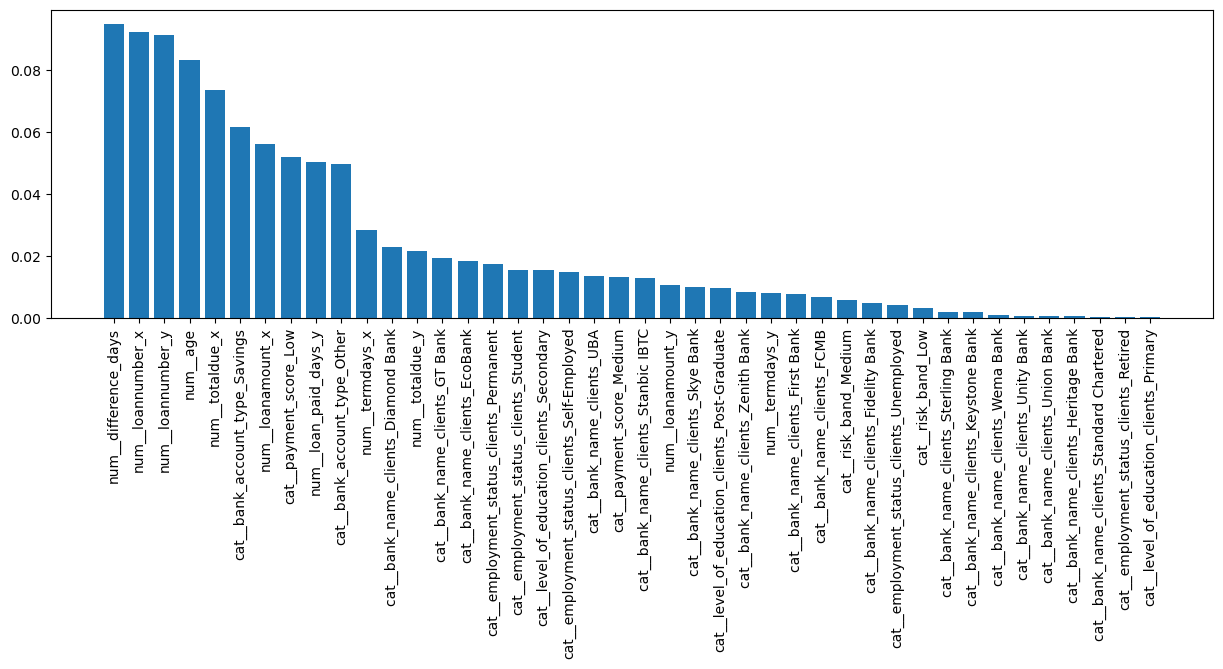

In [133]:
plt.figure(figsize=(15,4))

plt.bar(range(len(importance)),importance[sort])
plt.xticks(range(len(importance)),np.array(feature_names)[sort], rotation=90) 
plt.show()

### Save and Test the model 

In [134]:
import pickle

In [135]:
final_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestClassifier(random_state=42))
    ])

In [136]:
# fit it on the whole dataset
final_model.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['loannumber_x',
                                                   'loanamount_x', 'totaldue_x',
                                                   'termdays_x', 'loannumber_y',
                                                   'loanamount_y', 'totaldue_y',
                                                   'termdays_y',
                                                   'loan_paid_days_y',
                                                   'difference_days', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['risk_band', 'payment_score',
                                                   'level_of_education_clients',
                                                   'employment_status_clients',
                                                   'bank_name_clients',
                                                   'bank_account_type'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [137]:
# save the model using pickle
filename = 'wisdom_loan_predictor.pkl'
pickle.dump(final_model, open(filename, 'wb'))

In [138]:
# Load 
model = pickle.load(open(filename, 'rb'))

In [139]:
df.columns

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'good_bad_flag', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'systemloanid_y', 'loannumber_y',
       'approveddate_y', 'creationdate_y', 'loanamount_y', 'totaldue_y',
       'termdays_y', 'closeddate', 'firstduedate', 'firstrepaiddate',
       'loan_default', 'loan_paid_days_y', 'difference_days', 'age',
       'payment_score', 'risk_band'],
      dtype='object')

In [140]:
df.bank_name_clients.unique()

array(['Diamond Bank', 'EcoBank', 'First Bank', 'GT Bank', 'Access Bank',
       'UBA', 'Union Bank', 'FCMB', 'Zenith Bank', 'Stanbic IBTC',
       'Fidelity Bank', 'Wema Bank', 'Sterling Bank', 'Skye Bank',
       'Keystone Bank', 'Heritage Bank', 'Unity Bank',
       'Standard Chartered'], dtype=object)

In [141]:
# new data
'loannumber_x', 'loanamount_x', 'termdays_x','bank_account_type', 'bank_name_clients', 'totaldue_x',
'employment_status_clients', 'level_of_education_clients', 'loannumber_y'
'loanamount_y', 'totaldue_y', 'termdays_y', 'age',
'loan_paid_days_y', 'difference_days', 'risk_band', 'payment_score'

data = {
    'loannumber_x': [12],
    'loanamount_x': [30000.0],
    'termdays_x': [30],
    'bank_account_type': ['Savings'],
    'bank_name_clients': ['Wema Bank'],
    'totaldue_x': [34500.0],
    'employment_status_clients': ['Permanent'],
    'level_of_education_clients':['Post-Graduate'],
    'loannumber_y' : [11],
    'loanamount_y' :[10000.0],
    'totaldue_y' : [13000.0],
    'termdays_y' : [30],
    'age' :[53],
    'loan_paid_days_y':[16],
    'difference_days' :[0],
    'risk_band' :['Medium'],
    'payment_score': ['High'] 

}

In [142]:
# create our dataframe
df = pd.DataFrame(data)

In [143]:
df

,loannumber_x,loanamount_x,termdays_x,bank_account_type,bank_name_clients,totaldue_x,employment_status_clients,level_of_education_clients,loannumber_y,loanamount_y,totaldue_y,termdays_y,age,loan_paid_days_y,difference_days,risk_band,payment_score
0,12,30000.0,30,Savings,Wema Bank,34500.0,Permanent,Post-Graduate,11,10000.0,13000.0,30,53,16,0,Medium,High


In [144]:
# use model for prediction 
Loan = model.predict(df)

In [145]:
# Interpret the prediction (assuming 0 for Bad, 1 for Good)
if Loan[0] == 1:
    print("The model predicts the loan will be 'paid back in time'.")
else:
    print("The model predicts the loan will not be 'paid back in time' .")

The model predicts the loan will be 'paid back in time'.


In [146]:
new_df

,good_bad_flag,risk_band,loannumber_x,loanamount_x,totaldue_x,termdays_x,loannumber_y,loanamount_y,totaldue_y,termdays_y,loan_paid_days_y,payment_score,difference_days,age,level_of_education_clients,employment_status_clients,bank_name_clients,bank_account_type
0,1,Low,12,30000.0,34500.0,30,2,10000.0,13000.0,30,16,Low,14,53,Post-Graduate,Permanent,Diamond Bank,Other
1,1,Low,12,30000.0,34500.0,30,9,10000.0,13000.0,30,29,Low,1,53,Post-Graduate,Permanent,Diamond Bank,Other
2,1,Medium,12,30000.0,34500.0,30,8,20000.0,23800.0,30,52,High,-22,53,Post-Graduate,Permanent,Diamond Bank,Other
3,1,Medium,12,30000.0,34500.0,30,10,20000.0,24500.0,30,24,Low,6,53,Post-Graduate,Permanent,Diamond Bank,Other
4,1,Medium,12,30000.0,34500.0,30,11,20000.0,24500.0,30,26,Low,4,53,Post-Graduate,Permanent,Diamond Bank,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13668,0,Low,8,30000.0,34500.0,30,1,10000.0,13000.0,30,20,Low,10,37,Graduate,Permanent,GT Bank,Savings
13669,0,Medium,8,30000.0,34500.0,30,4,20000.0,23800.0,30,26,Low,4,37,Graduate,Permanent,GT Bank,Savings
13670,0,Medium,8,30000.0,34500.0,30,5,20000.0,23800.0,30,27,Low,3,37,Graduate,Permanent,GT Bank,Savings
13671,0,Low,8,30000.0,34500.0,30,2,10000.0,13000.0,30,29,Low,1,37,Graduate,Permanent,GT Bank,Savings
